In [1]:
import os
os.environ['HF_HOME'] = '/disk/onyx-scratch/glucc002/hf_cache'
os.environ['HF_DATASETS_CACHE'] = '/disk/onyx-scratch/glucc002/hf_cache'

from llada_mi.setup import load_model_and_tokenizer, get_generation_parameters
from llada_mi.inference import generate_with_logitlens
from llada_mi.viz import HeatmapData, show_heatmap_step, compare_steps, save_animation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model, tokenizer, device = load_model_and_tokenizer()
generation_params = get_generation_parameters(
    steps=12,
    gen_length=8,
    block_length=8,
    temperature=0.0,
    remasking="low_confidence",
    mask_id=126336,  # Specific to LLaDA models
)

prompt_text = "The quick brown fox"
input_ids = tokenizer(prompt_text, return_tensors='pt')['input_ids'].to(device)

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

In [2]:
# move everything to the GPU
model.to('cuda')
input_ids = input_ids.to('cuda')

final_x, all_logits, all_hidden_states = generate_with_logitlens(
    model, 
    input_ids, 
    **generation_params
)

final_gen_tokens = tokenizer.batch_decode(final_x[:, input_ids.shape[1]:], skip_special_tokens=True)[0]
print(f"Final generated sequence: {prompt_text + final_gen_tokens}")
print(f"Total diffusion timesteps: {len(all_logits)}")

Final generated sequence: The quick brown fox jumps over the lazy dog."


Total diffusion timesteps: 12


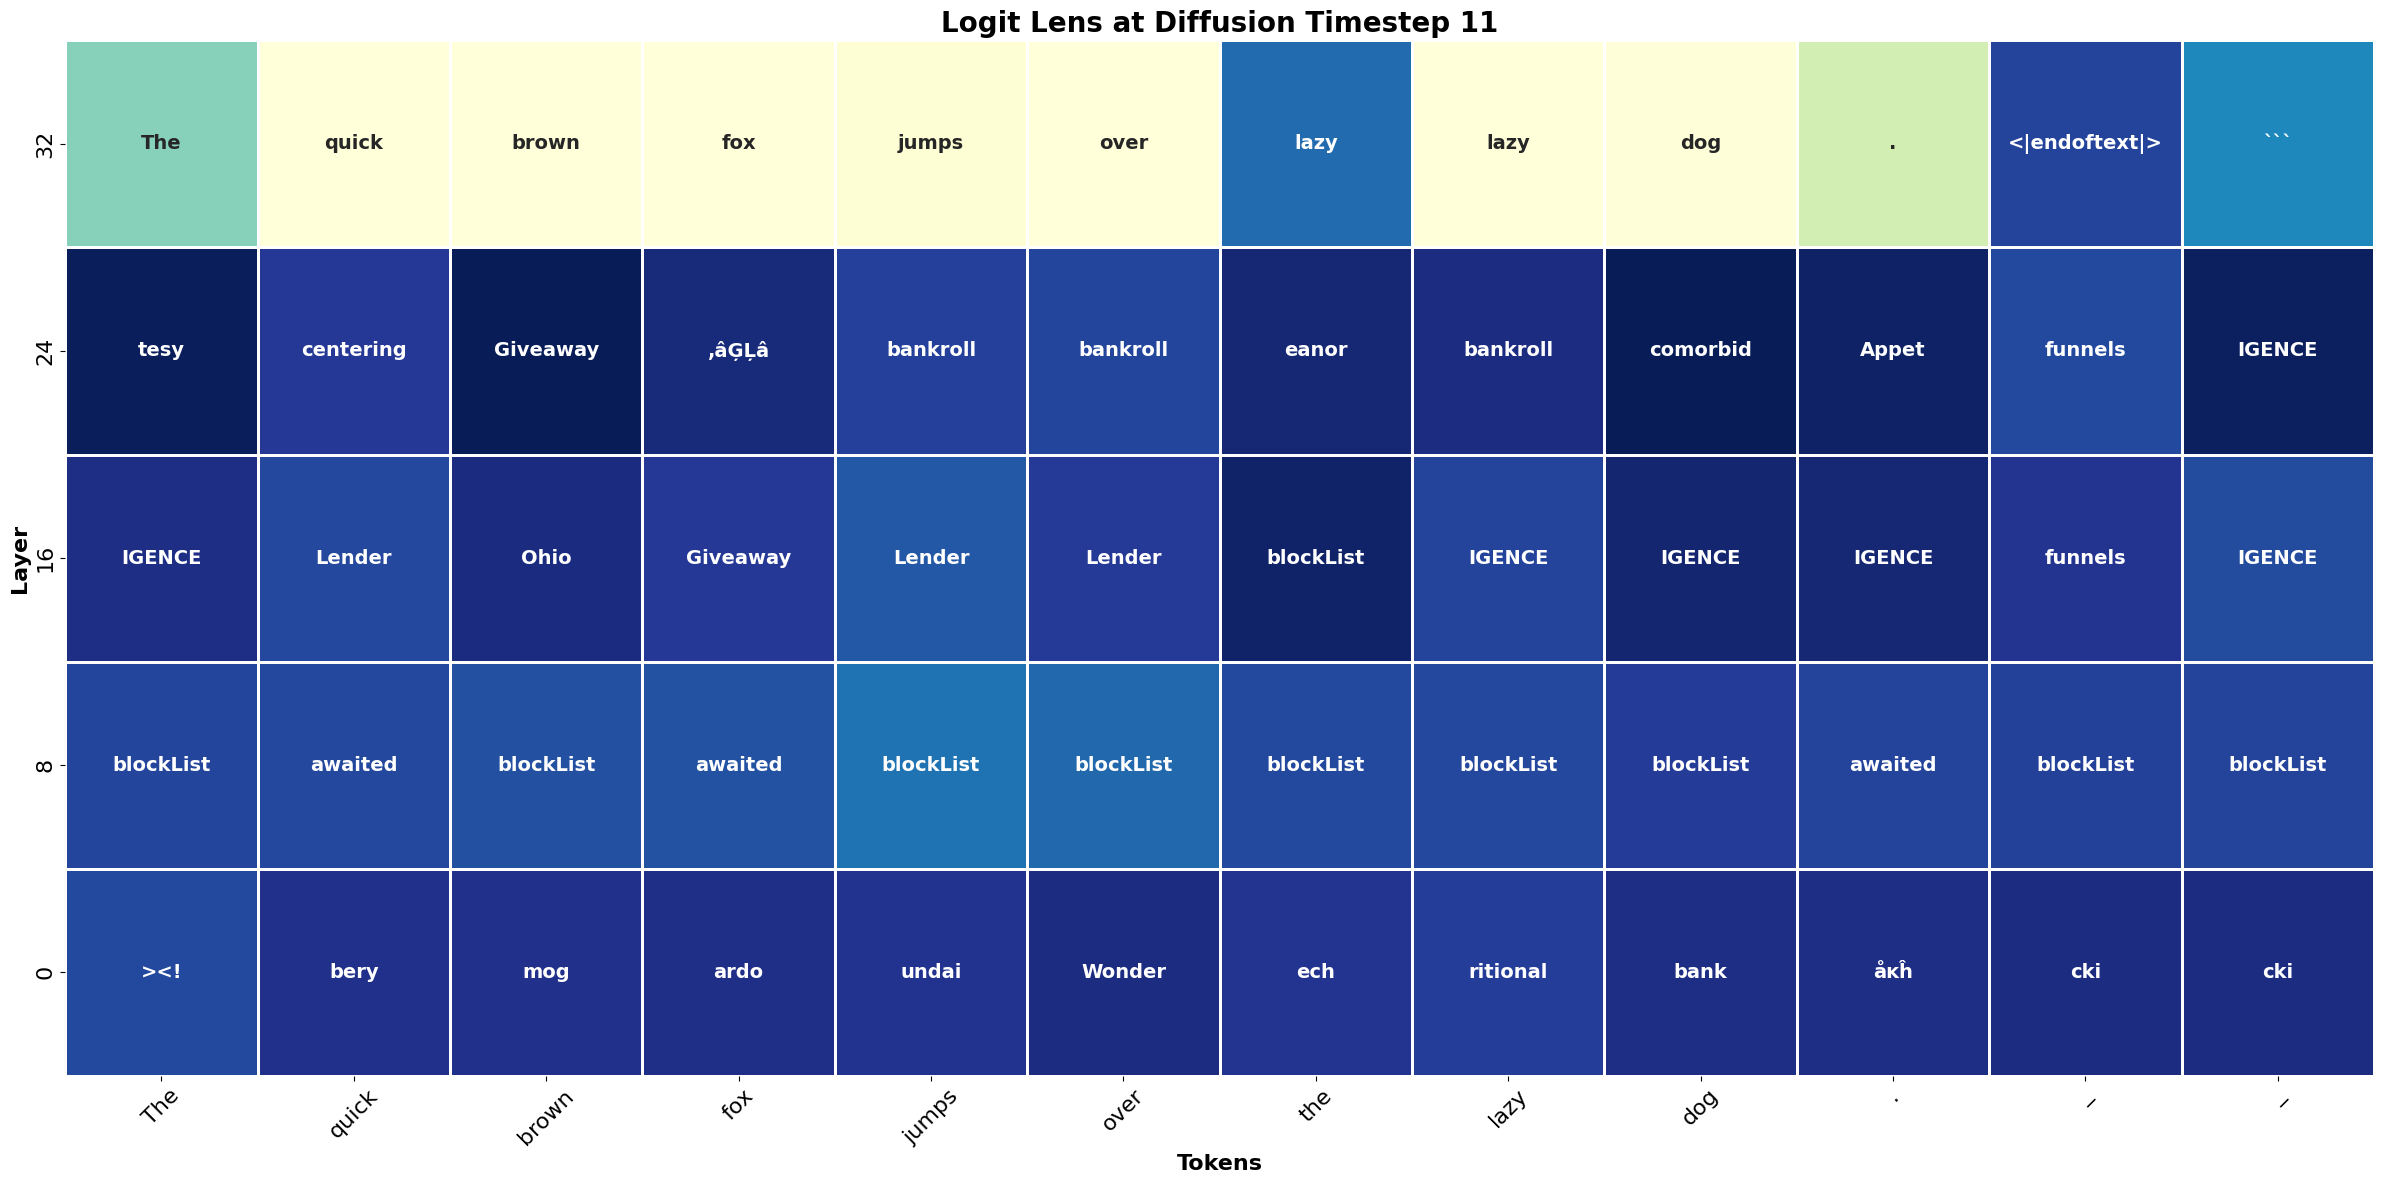

In [3]:
# convert to array

total_timesteps = all_logits.shape[0]
skip_every_n = 8

data = HeatmapData(model, all_hidden_states, final_x, tokenizer)

show_heatmap_step(data, total_timesteps - 1, skip_every_n)

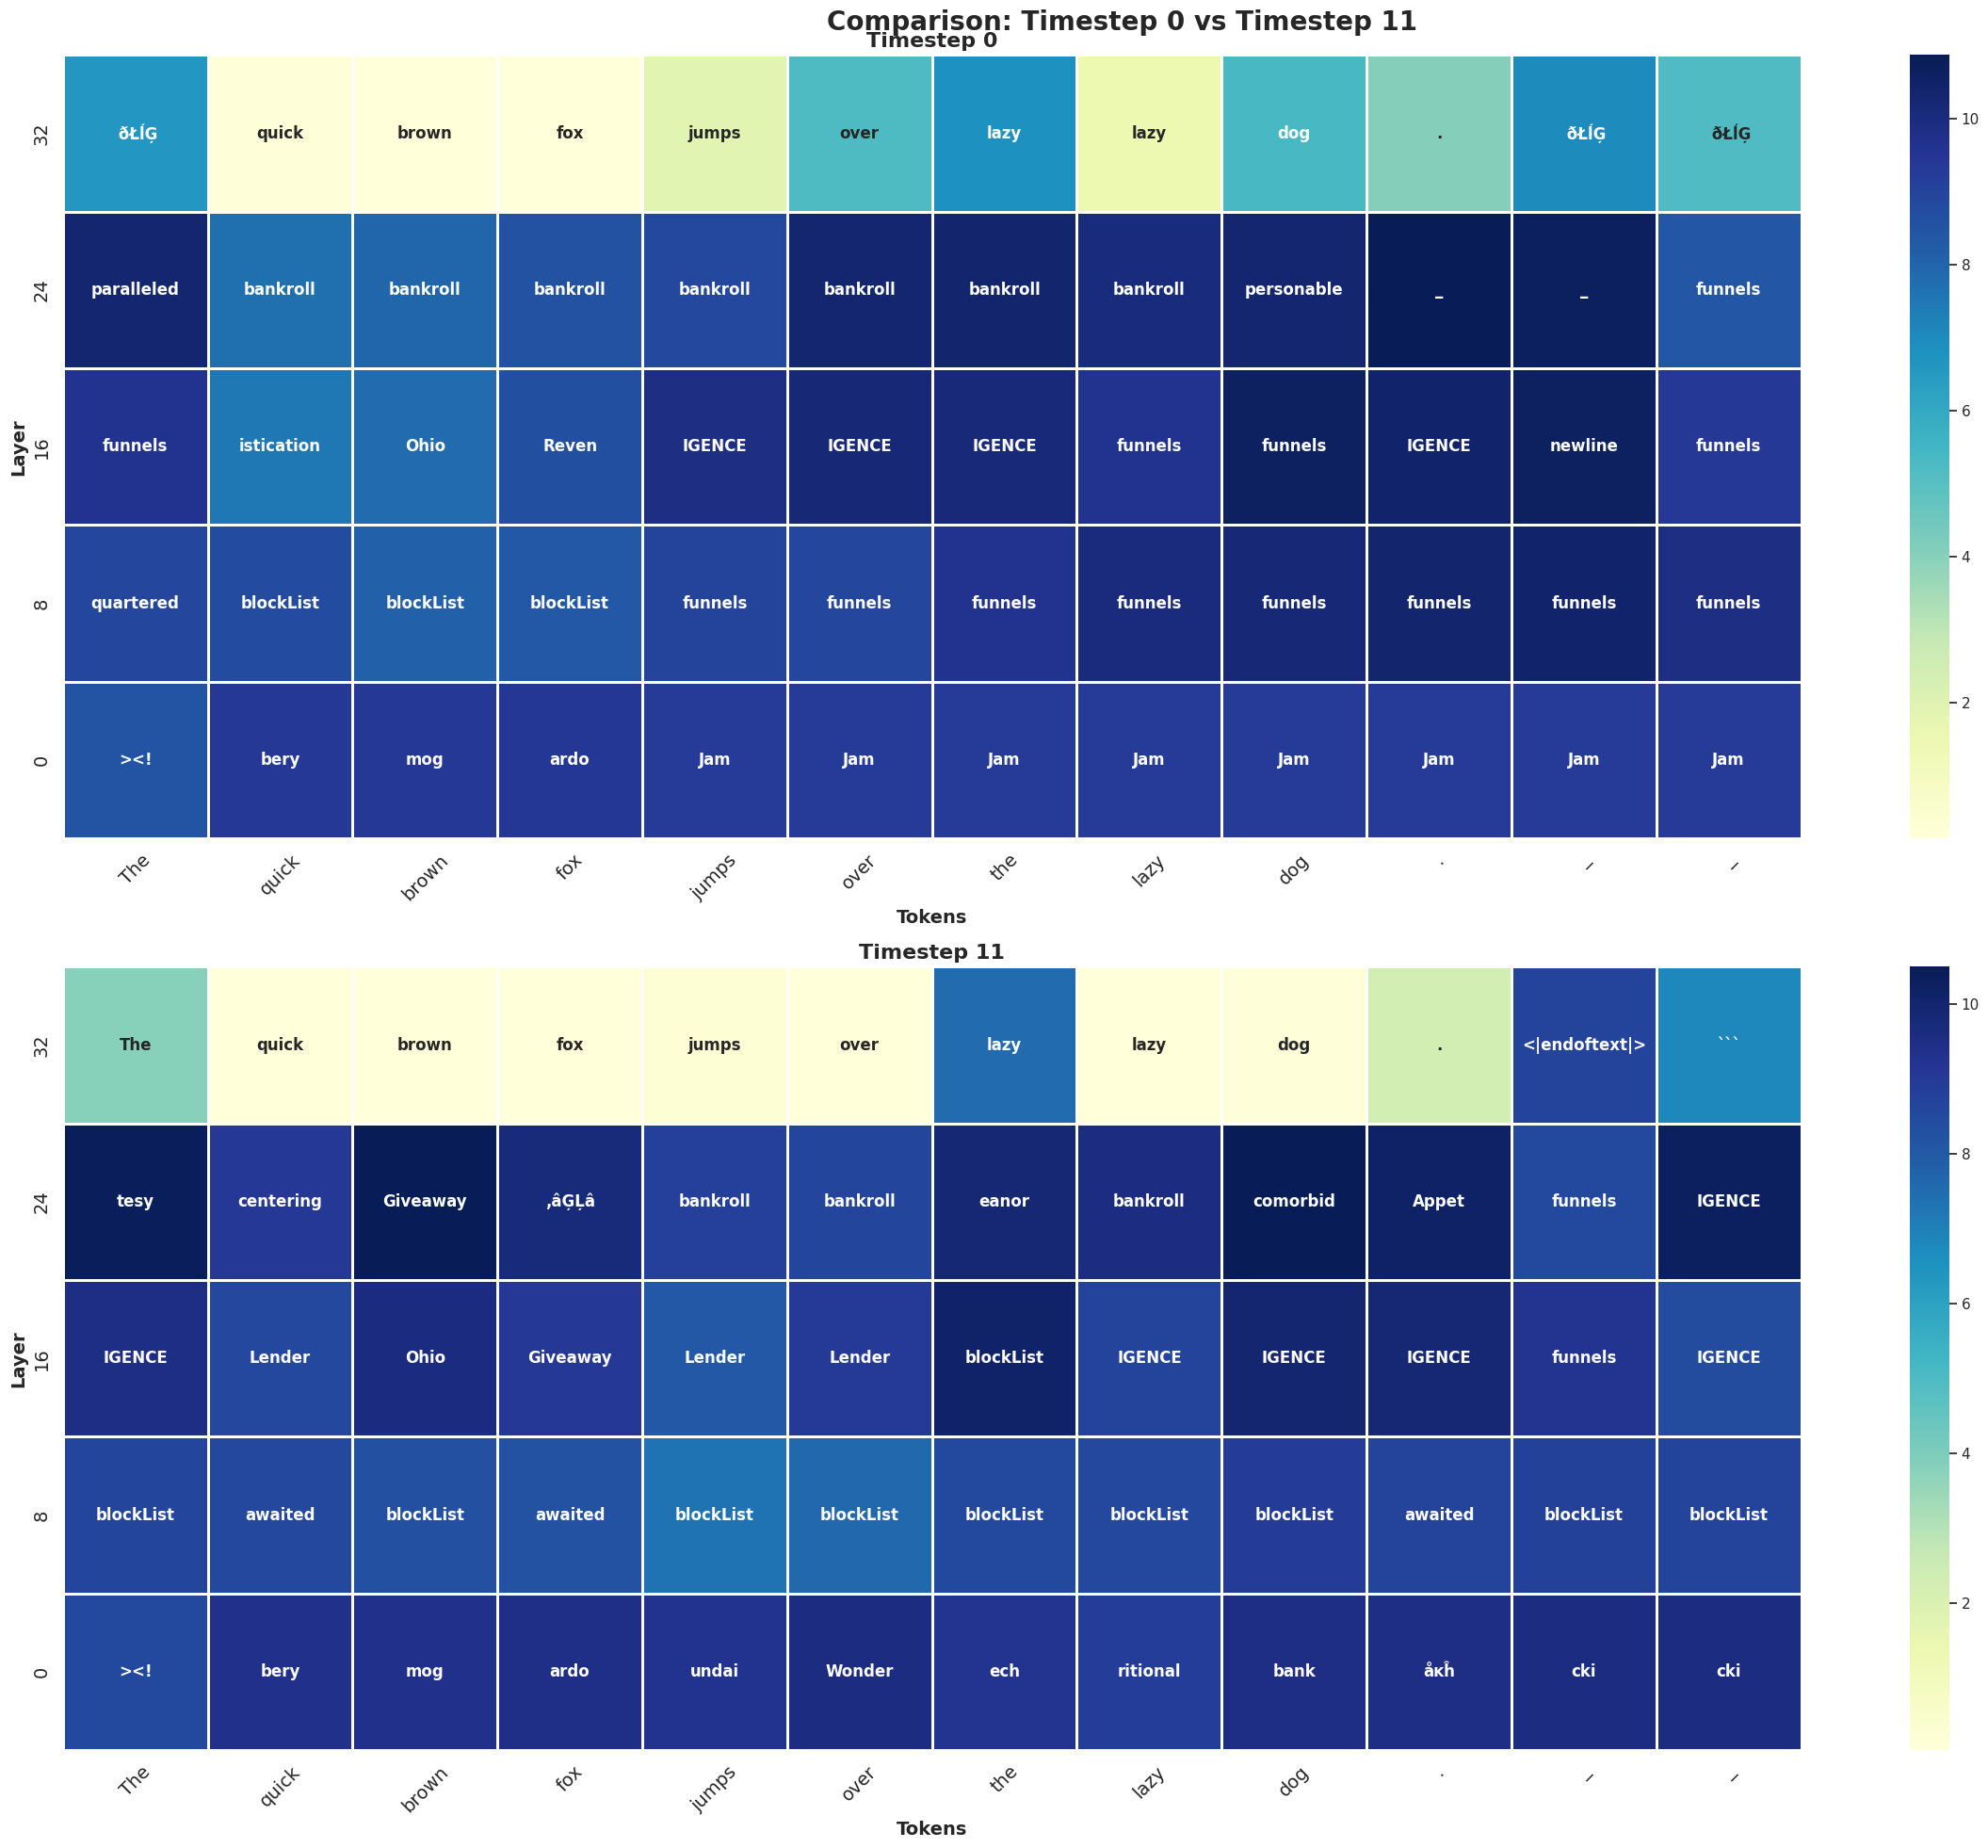

In [4]:
compare_steps(data, 0, total_timesteps - 1, skip_every_n)

In [5]:
output_path = save_animation(
    data, 
    output_path="timestep_animation.gif",
    interval_ms=1000,
    skip_every_n=4,
    dpi=100
)


Creating GIF animation with 12 timesteps...
Processing timestep 0/11
Processing timestep 1/11
Processing timestep 2/11
Processing timestep 3/11
Processing timestep 4/11
Processing timestep 5/11
Processing timestep 6/11
Processing timestep 7/11
Processing timestep 8/11
Processing timestep 9/11
Processing timestep 10/11
Processing timestep 11/11
